<a href="https://colab.research.google.com/github/yuuaki1/ML-NoteBooks/blob/main/Ridge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

In [4]:
X, y = make_regression(n_samples = 100, n_features= 1, n_informative=1, n_targets=1, noise = 20, random_state=13)

plt.scatter(X, y)

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
lr = LinearRegression()
lr.fit(X, y)
print(lr.coef_)
print(lr.intercept_)

[27.82809103]
-2.29474455867698


In [8]:
from sklearn.linear_model import Ridge

In [16]:
rr = Ridge(alpha = 10) # if alpha big, underfitting, if too low, overfitting
rr.fit(X, y)
print(rr.coef_)
print(rr.intercept_)

[24.9546267]
-2.1269130035235735


In [18]:
rr1 = Ridge(alpha = 100) # if alpha big, underfitting, if too low, overfitting
rr1.fit(X, y)
print(rr1.coef_)
print(rr1.intercept_)

[12.93442104]
-1.4248441496033308


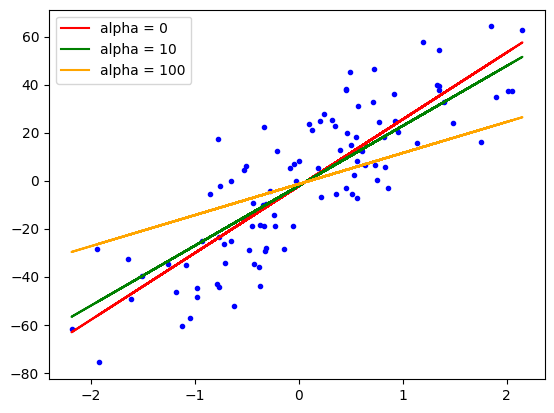

In [20]:
plt.plot(X, y, 'b.')
plt.plot(X, lr.predict(X), color = 'red', label = 'alpha = 0')
plt.plot(X, rr.predict(X), color = 'green', label = 'alpha = 10')
plt.plot(X, rr1.predict(X), color = 'orange', label = 'alpha = 100')
plt.legend()

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 13)

In [31]:
class MyRidge:

  def __init__(self, alpha = 0.1):
    self.alpha = alpha
    self.m = None
    self.b = None

  def fit(self, X, y):
    num = 0
    den = 0
    for i in range(X_train.shape[0]):
      num += (X_train[i] - X_train.mean()) * (y_train[i] - y_train.mean())
      den = den + (X_train[i] - X_train.mean())**2

    self.m = num/(den + self.alpha)
    self.b = y_train.mean() - (self.m * X_train.mean())
    print(self.m, self.b)

  def predict(self, X_test):
    return self.m * X_test + self.b

In [32]:
reg = MyRidge()
reg.fit(X_train, y_train)

[28.63236379] [-2.09112003]
